# Установка библиотек

In [246]:
import pandas as pd
import numpy as np

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns


Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

Загрузим данные в память ноутбука.

In [148]:
data = pd.read_csv('./data/pizzas.csv')

In [149]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [150]:

data.head()


,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [151]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [152]:
alpha = 0.05

## Тест Шапиро-Уилка

In [153]:
_, p = shapiro(data)
print('p=%.3f' % p)
# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [154]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])
print(p)
# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
[0.25143212 0.54105194]
Данные распределены нормально


# Независимый T-тест 

In [155]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [156]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [157]:

data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [158]:
print(corr,p)

0.8993477153477154 0.0


In [159]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [160]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [161]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [162]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [163]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143827 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [164]:
# Создаем DataFrame, который будет иметь в результате 2 признака, Петербург и Магадан, а значениями будут размеры мидий
russian_midies = pd.concat([p:=pd.Series(petersburg, name = 'petersburg'), m:=pd.Series(magadan, name='magadan')], axis=1, keys=[p.name,m.name])

***
Проведем тест на нормальность данных.
Для этого определим гипотезу, где
* H0 - данные распределены нормально
* Ha - данные распределены ненормально (т.е опровержение H0),
<br>где alfa(уровень значимости) = 0.05

In [165]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alfa = .05

Мы столкнулись с ситуацией, что мы имеем разное кол-во значений для каждого из признаков, поэтому проверку на нормальность будем делать для каждого из признаков отдельно

In [166]:
index = 0
_, p = shapiro(russian_midies.iloc[:,index][russian_midies.iloc[:,index].notna()])
print('p=%.3f' % p)
# Интерпретация 

region = ' для региона {}'.format(russian_midies.columns[index])
if p > alfa:
	print(H0+region)
else:
	print(Ha+region)

p=0.242
Данные распределены нормально для региона petersburg


In [167]:
index = 1
_, p = shapiro(russian_midies.iloc[:,index][russian_midies.iloc[:,index].notna()])
print('p=%.3f' % p)
# Интерпретация 

region = ' для региона {}'.format(russian_midies.columns[index])
if p > alfa:
	print(H0+region)
else:
	print(Ha+region)

p=0.036
Данные не распределены нормально (мы отвергаем H0) для региона magadan


***
Однако, учитывая, что признак Магадан у нас представлен 8-ю значениями, а это минимальное кол-во для проведения теста Д'Агостино, проведем этот тест для признака Магадан.

In [168]:
index = 1
_, p = normaltest(russian_midies.iloc[:,index][russian_midies.iloc[:,index].notna()])

print('p=%.3f' % p)

region = ' для региона {}'.format(russian_midies.columns[index])
if p > alfa:
	print(H0+region)
else:
	print(Ha+region)



p=0.154
Данные распределены нормально для региона magadan


C:\Users\Andrew\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Мы столкнулись с ситуацией, что два теста на нормальность делают разные выводы.

Тест Шапира-Уилка:
* Петербург - нормальное распределение
* Магадан - ненормальное распределение

Тест Д'Агостино:
* Петербург - (не можем приментьь тест, ввиду малого кол-ва данных)
* Магадан - нормальное распределение

Ради интереса посторим график, показывающий нормальность распределения

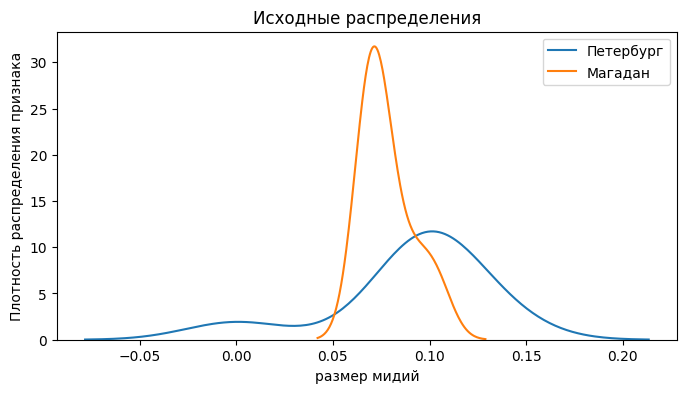

In [187]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 4))
ax1.set_title('Исходные распределения')
ax1.set(xlabel='размер мидий', ylabel='Плотность распределения признака')

sns.kdeplot(russian_midies.iloc[:,0], ax=ax1, label ='Петербург')
sns.kdeplot(russian_midies.iloc[:,1], ax=ax1, label ='Магадан')

plt.legend();

Лично я тут вижу нормальное распределение по обоим признакам.

Но проблема всей текущей ситуации, слишком маленькое количество данных. Отсюда я думаю, мы можем применить как параметритеские тесты, так и непараметрические.

В любом случае мы будем иметь большую вероятность ошибки, опять же исходя из малого набора данных


***
Проведем сравнительные тесты на определение влияния категориальной переменной на среднее значение. В нашем случае - это, зависит ли средний размер мидии от региона выращивания (Магадан, Петербург)

Так как мы не можем точно определиться с типом применения теста (параметрический против непараметрического), я думаю не будет большой ошибкой сделать анализ применив оба метода.

Еще раз повторюсь, все это из-за недостаточного количества данных

In [220]:
H0 = 'Нет значимой разницы между средним размером мидий в зависимости от региона выращивания.'
Ha = 'Есть значимая разница между средним размером мидий в зависимости от региона выращивания.'

Для <b>параметрического</b> сравнительного теста будем использовать независмый t-Test, так как мы имеем 1 (независмую) Категориальную переменную (Местность вылова/взращивания мидий) и зависимую переменную, количественную (размер мидий), которые происходят из разных совокупностей

In [221]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(russian_midies.iloc[:,0][russian_midies.iloc[:,0].notna()],\
        russian_midies.iloc[:,1][russian_midies.iloc[:,1].notna()],\
            equal_var=False)

    p = round(test_results[1],2)

    if p>alfa:
        print(f"{p} > {alfa}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alfa}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.42 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между средним размером мидий в зависимости от региона выращивания.


Для <b>непараметрического</b> сравнительного теста будем использовать Тест Вилкоксона-Манна-Уитни(он же или Манна-Уитни тест U или сумма ранга Вилкоксона тест), так как мы имеем 1 (независмую) Категориальную переменную (Местность вылова/взращивания мидий) и зависимую переменную, количественную (размер мидий), которые происходят из разных совокупностей

In [215]:
_, p = mannwhitneyu(russian_midies.iloc[:,0][russian_midies.iloc[:,0].notna()],\
  russian_midies.iloc[:,1][russian_midies.iloc[:,1].notna()])

p = round(p,3)

if p>alfa:
   print(f"{p} > {alfa}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alfa}. Мы отвергаем нулевую гипотезу. {Ha}")

0.05 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером мидий в зависимости от региона выращивания.


***
В вообщем ничего утешительного опять нету, Параметрический тест указывает на то что значимых различий в размерах нету, Непараметрический указывает на то что есть. Остается еще провести анализ на корреляцию, опять же для обоих случаев

In [225]:
H0 = 'Отсутствует зависимость между переменными'
Ha = 'Присутствует зависимость между переменными'

In [223]:
_, p = pearsonr(russian_midies.iloc[:,0][russian_midies.iloc[:,0].notna()][:7], russian_midies.iloc[:,1][russian_midies.iloc[:,1].notna()][:7])
print('p=%.3f' % p, 'корреляция=%.2f' % _)

p = round(p,3)
if p>alfa:
  print(f"{p} > {alfa}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alfa}. Мы отвергаем нулевую гипотезу. {Ha}")

p=0.581 корреляция=0.26
0.581 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Отсутствует зависимость между переменными


In [226]:
_, p = spearmanr(russian_midies.iloc[:,0][russian_midies.iloc[:,0].notna()][:7], russian_midies.iloc[:,1][russian_midies.iloc[:,1].notna()][:7])
print('p=%.3f' % p, 'корреляция=%.2f' % _)

p = round(p,3)
if p>alfa:
  print(f"{p} > {alfa}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alfa}. Мы отвергаем нулевую гипотезу. {Ha}")

p=0.760 корреляция=0.14
0.76 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Отсутствует зависимость между переменными


***
Итак, мы расчитали коэффициенты корреляции Пирсона и Спирмена (параметрический, непараметрический соответственно). Оба теста показали нам, что взаимосвязей между категориальными признаками не существует. 

In [235]:
russian_midies.describe().loc['mean']

petersburg    0.090512
magadan       0.078012
Name: mean, dtype: float64

***
# Выводы

1. Слишком маленький датасет, 7 и 8 значений по каждому из признаков
2. Статистические тесты на нормальность не дают однозначного ответа, являются ли оба признака распределены нормально
3. В виду отсутствия точного понимания нормальности распределения данных, проверка корреляционности данных и сравнительные тесты проводились в двух вариантах, как параметрические, так и не параметрические
4. В итоге мы точно знаем, что признаки не коррелированы, а вот сравнительные тесты показывают, что в случае параметрических тестов - есть значимая разница между размером мидий, а в непараметрических нету.
5. Также относительно вопроса о среднем размере мидий. В петербурге средний размер составляет 9.05 см против 7.8см в Магадане. И еще раз добавим, что в случае параметрического сравнительного теста, размер связан с категорильным признаком, а в непараметрическом - нет.


# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [236]:
data = pd.read_csv('./data/blood_pressure.csv')

In [237]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [ ]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [244]:
_ ,p = stests.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датаcете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [261]:
p_0 = .4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [262]:
#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

if p < 0.05:
    print(p, "Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

0.028459736916310565 Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
